Importing:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import numpy as np

#### Auxiliary functions

In [3]:
# Polynomial regression function
def PolynomialRegression( degree = 2, **kwargs):
    return make_pipeline( PolynomialFeatures(degree), LinearRegression(**kwargs) )

#### Create data

In [5]:
def make_data( N , err = 1.0, rseed =1 ):
    # randomly create data
    rng = np.random.RandomState( rseed )
    X = rng.rand( N, 1 ) ** 2
    Y = 10 - 1. / ( X.ravel() + 0.1 )
    if err > 0:
        Y += err * rng.randn( N )
    return X, Y

In [6]:
X, Y = make_data(40)

In [13]:
X_test = np.linspace( -0.1, 1.1, 500)
X_test = X_test[:, None]

#### Plotting

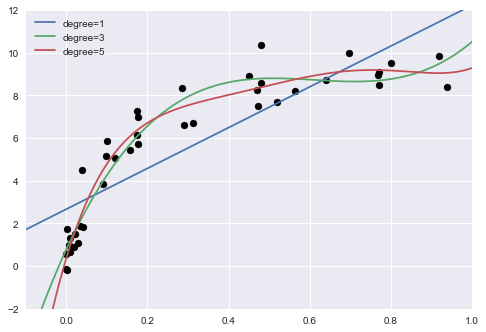

In [17]:
plt.scatter( X.ravel(), Y, color = 'black')
axis = plt.axis()

for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,Y).predict(X_test)
    plt.plot( X_test.ravel(), y_test, label = 'degree={0}'.format(degree) )

plt.xlim(-0.1,1.0)
plt.ylim(-2, 12)
plt.legend( loc = 'best' )

#### Validation curve to find the best degree of the polynomial

In [19]:
from sklearn.model_selection import validation_curve

In [20]:
degree = np.arange(0,21)

In [22]:
train_score, val_score = validation_curve( PolynomialRegression(), 
                                          X, Y, 'polynomialfeatures__degree',
                                         degree, cv =7 )

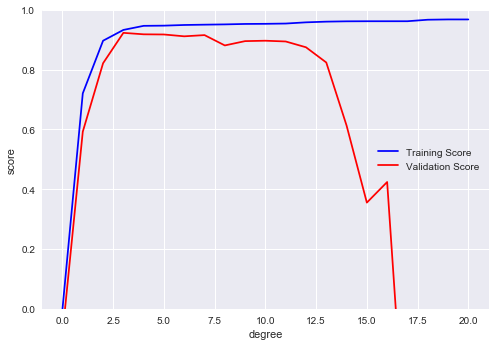

In [24]:
plt.plot( degree, np.median(train_score, 1), color = 'blue', label = 'Training Score' )
plt.plot( degree, np.median(val_score, 1), color = 'red', label = 'Validation Score' )
plt.legend( loc ='best' )
plt.ylim( 0, 1 )
plt.xlabel( 'degree' )
plt.ylabel( 'score' )

## Repeat everythin with much more data

In [26]:
X, Y = make_data(400)

In [27]:
train_score, val_score = validation_curve( PolynomialRegression(), 
                                          X, Y, 'polynomialfeatures__degree',
                                         degree, cv =7 )

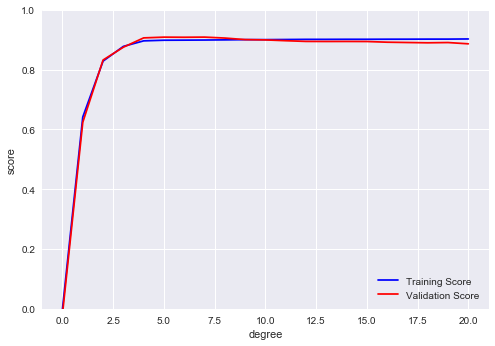

In [29]:
plt.plot( degree, np.median(train_score, 1), color = 'blue', label = 'Training Score' )
plt.plot( degree, np.median(val_score, 1), color = 'red', label = 'Validation Score' )
plt.legend( loc ='best' )
plt.ylim( 0, 1 )
plt.xlabel( 'degree' )
plt.ylabel( 'score' )

Note that the number of data points has a **huge** impact on the model complexity that we can fit

### Learning curves

In [30]:
from sklearn.learning_curve import learning_curve

In [36]:
X, Y = make_data(40)

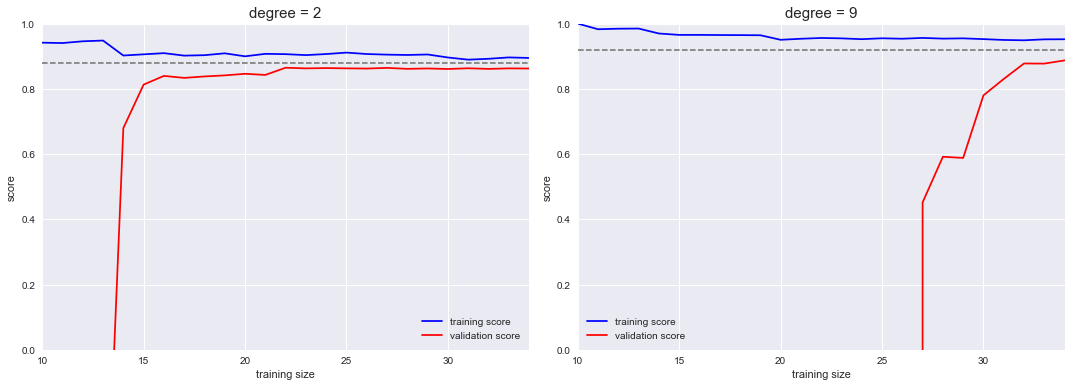

In [37]:
fig, ax = plt.subplots( 1, 2, figsize = (16, 6) )
fig.subplots_adjust( left=0.0625, right = 0.95, wspace = 0.1)

for i , degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve( PolynomialRegression(degree), 
                                        X, Y, cv=7, 
                                        train_sizes = np.linspace(0.3, 1, 25) )
    
    ax[i].plot( N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot( N, np.mean(val_lc, 1), color = 'red', label = 'validation score' )
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray', 
                linestyle = 'dashed' )
    ax[i].set_ylim( 0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title( 'degree = {0}'.format(degree) , size =15 )
    ax[i].legend( loc = 'best' )